In [ ]:
Project Description

#Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
#You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

About The Dataset
#The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 

#The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 

#This is a binary classification problem

In [6]:
#Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
#loading the train data
train=pd.read_csv(r"C:\Users\bee\Desktop\Data set\termdeposit_train.csv")
test=pd.read_csv(r"C:\Users\bee\Desktop\Data set\termdeposit_test.csv")

In [9]:
#first five records of train data
train.head()

ID  age         job   marital  education default  balance housing loan  \
0  26110   56      admin.   married    unknown      no     1933      no   no   
1  40576   31     unknown   married  secondary      no        3      no   no   
2  15320   27    services   married  secondary      no      891     yes   no   
3  43962   57  management  divorced   tertiary      no     3287      no   no   
4  29842   31  technician   married  secondary      no      119     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   

  subscribed  
0         no  
1         no  
2         no  
3        yes  
4         no

In [10]:
#last five records of train data
train.tail()

ID  age         job   marital  education default  balance housing  \
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   
31645  38556   57  technician   married  secondary      no      225     yes   
31646  14156   55  management  divorced  secondary      no      204     yes   

      loan    contact  day month  duration  campaign  pdays  previous  \
31642   no   cellular   12   may       116         2     -1         0   
31643  yes   cellular    5   jun       438         2     -1         0   
31644   no   cellular    7   aug        37         3     -1         0   
31645   no  telephone   15   may        22         7    337        12   
31646   no   cellular   11   jul      1973         2     -1         0   

      poutcome subscribed  
31642  unknown         no  
31643  unknown        yes  
31644  unknown         no  
31645  failure         no  
31646  unknown        yes

In [11]:
#first five records of test data
test.head()

ID  age            job   marital  education default  balance housing  \
0  38441   32       services   married  secondary      no      118     yes   
1  40403   78        retired  divorced    primary      no     2787      no   
2   3709   31  self-employed    single   tertiary      no      144     yes   
3  37422   57       services    single    primary      no     3777     yes   
4  12527   45    blue-collar  divorced  secondary      no     -705      no   

  loan    contact  day month  duration  campaign  pdays  previous poutcome  
0   no   cellular   15   may        20         6     -1         0  unknown  
1   no  telephone    1   jul       372         1     -1         0  unknown  
2   no    unknown   16   may       676         1     -1         0  unknown  
3   no  telephone   13   may        65         2     -1         0  unknown  
4  yes    unknown    3   jul       111         1     -1         0  unknown

In [12]:
#last five records of train data
test.tail()

ID  age          job  marital  education default  balance housing  \
13559  23465   39   management  married   tertiary      no       45      no   
13560  11743   54  blue-collar  married    primary      no     2281     yes   
13561  28292   35      retired  married    primary      no      285     yes   
13562  45163   29       admin.   single  secondary      no      464      no   
13563  34839   29       admin.  married  secondary      no        2     yes   

      loan   contact  day month  duration  campaign  pdays  previous poutcome  
13559   no  cellular   28   aug       148         4     -1         0  unknown  
13560   no   unknown   20   jun       158         1     -1         0  unknown  
13561   no  cellular   29   jan       136         1     -1         0  unknown  
13562   no  cellular    9   nov       208         2     91         3  success  
13563   no  cellular    6   may       339         1    362         1  failure

In [13]:
#Checking shapes of each data set
train.shape

(31647, 18)

In [14]:
test.shape

(13564, 17)

In [15]:
#Checking data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [17]:
#checking columns of each dataset
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [19]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [212]:
#By checking columns we see that we have 17 similar columns with 'subscribed as the target variable '

In [20]:
#Checking Duplicate value in train data
print("Total Duplicate Rows are",train.duplicated().sum())# no duplicates

Total Duplicate Rows are 0


In [21]:
#Checking Duplicate value in test data
print("Total Duplicate Rows are",test.duplicated().sum())#no duplicates

Total Duplicate Rows are 0


In [22]:
#Checking for train data null values
train.isnull().sum()# no null values

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [23]:
#Checking for train test null values
test.isnull().sum()# no null values

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

<Axes: >

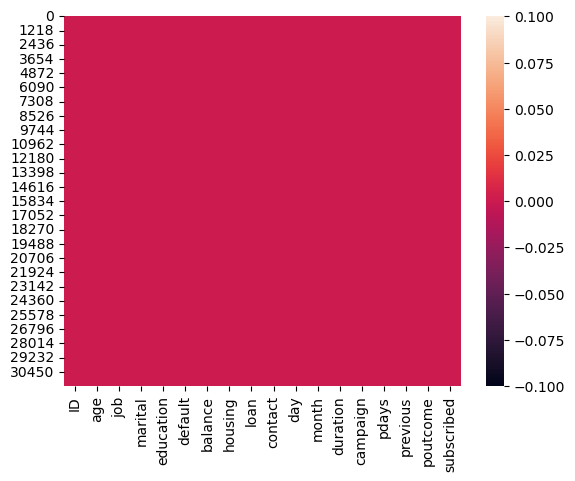

In [24]:
#visualize null using a heatmap
sns.heatmap(train.isnull())

In [25]:
#drop irrelevant columns
train=train.drop("ID",axis=1)

In [26]:
#drop irrelevant columns
test=test.drop("ID",axis=1)

In [27]:
train# print dataframe to check if the irrelevant columns have been removed

age         job   marital  education default  balance housing loan  \
0       56      admin.   married    unknown      no     1933      no   no   
1       31     unknown   married  secondary      no        3      no   no   
2       27    services   married  secondary      no      891     yes   no   
3       57  management  divorced   tertiary      no     3287      no   no   
4       31  technician   married  secondary      no      119     yes   no   
...    ...         ...       ...        ...     ...      ...     ...  ...   
31642   29  management    single   tertiary      no        0     yes   no   
31643   53  management  divorced   tertiary      no      380      no  yes   
31644   32  management    single   tertiary      no      312      no   no   
31645   57  technician   married  secondary      no      225     yes   no   
31646   55  management  divorced  secondary      no      204     yes   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
0      telephone   19   nov        44         2     -1         0  unknown   
1       cellular   20   jul        91         2     -1         0  unknown   
2       cellular   18   jul       240         1     -1         0  unknown   
3       cellular   22   jun       867         1     84         3  success   
4       cellular    4   feb       380         1     -1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
31642   cellular   12   may       116         2     -1         0  unknown   
31643   cellular    5   jun       438         2     -1         0  unknown   
31644   cellular    7   aug        37         3     -1         0  unknown   
31645  telephone   15   may        22         7    337        12  failure   
31646   cellular   11   jul      1973         2     -1         0  unknown   

      subscribed  
0             no  
1             no  
2             no  
3            yes  
4             no  
...          ...  
31642         no  
31643        yes  
31644         no  
31645         no  
31646        yes  

[31647 rows x 17 columns]

In [28]:
test# print dataframe to check if the irrelevant columns have been removed

age            job   marital  education default  balance housing loan  \
0       32       services   married  secondary      no      118     yes   no   
1       78        retired  divorced    primary      no     2787      no   no   
2       31  self-employed    single   tertiary      no      144     yes   no   
3       57       services    single    primary      no     3777     yes   no   
4       45    blue-collar  divorced  secondary      no     -705      no  yes   
...    ...            ...       ...        ...     ...      ...     ...  ...   
13559   39     management   married   tertiary      no       45      no   no   
13560   54    blue-collar   married    primary      no     2281     yes   no   
13561   35        retired   married    primary      no      285     yes   no   
13562   29         admin.    single  secondary      no      464      no   no   
13563   29         admin.   married  secondary      no        2     yes   no   

         contact  day month  duration  campaign  pdays  previous poutcome  
0       cellular   15   may        20         6     -1         0  unknown  
1      telephone    1   jul       372         1     -1         0  unknown  
2        unknown   16   may       676         1     -1         0  unknown  
3      telephone   13   may        65         2     -1         0  unknown  
4        unknown    3   jul       111         1     -1         0  unknown  
...          ...  ...   ...       ...       ...    ...       ...      ...  
13559   cellular   28   aug       148         4     -1         0  unknown  
13560    unknown   20   jun       158         1     -1         0  unknown  
13561   cellular   29   jan       136         1     -1         0  unknown  
13562   cellular    9   nov       208         2     91         3  success  
13563   cellular    6   may       339         1    362         1  failure  

[13564 rows x 16 columns]

In [29]:
#Seperating numerical and categorical columns.Checking for categorical columns
categorical_col=[]
for i in train.dtypes.index:
    if train.dtypes[i]=="object":
        categorical_col.append(i)
        print("categorical columns:",categorical_col)
        print("\n")

categorical columns: ['job']


categorical columns: ['job', 'marital']


categorical columns: ['job', 'marital', 'education']


categorical columns: ['job', 'marital', 'education', 'default']


categorical columns: ['job', 'marital', 'education', 'default', 'housing']


categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan']


categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact']


categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']


categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']




In [30]:
#Seperating numerical and categorical columns.Checking for categorical columns
categorical_col=[]
for i in test.dtypes.index:
    if test.dtypes[i]=="object":
        categorical_col.append(i)
        print("categorical columns:",categorical_col)
        print("\n")

categorical columns: ['job']


categorical columns: ['job', 'marital']


categorical columns: ['job', 'marital', 'education']


categorical columns: ['job', 'marital', 'education', 'default']


categorical columns: ['job', 'marital', 'education', 'default', 'housing']


categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan']


categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact']


categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']


categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']




In [31]:
#checking number of unique values
train.nunique().to_frame("No. of Unique values")

No. of Unique values
age                           76
job                           12
marital                        3
education                      4
default                        2
balance                     6326
housing                        2
loan                           2
contact                        3
day                           31
month                         12
duration                    1454
campaign                      45
pdays                        509
previous                      38
poutcome                       4
subscribed                     2

In [33]:
#checking number of unique values
test.nunique().to_frame("No. of Unique values")

No. of Unique values
age                          75
job                          12
marital                       3
education                     4
default                       2
balance                    4292
housing                       2
loan                          2
contact                       3
day                          31
month                        12
duration                   1201
campaign                     40
pdays                       422
previous                     33
poutcome                      4

In [34]:
#checking the list of counts of target column.There are two categories present in the target column (subscribed),no,yes 
train["subscribed"].unique()

array(['no', 'yes'], dtype=object)

In [35]:
#checking the list of counts of target column.There are two categories present in the target column (subscribed),no,yes 
train["subscribed"].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [39]:
#Statistical summary of numerical columns
train.describe()

age        balance           day      duration      campaign  \
count  31647.000000   31647.000000  31647.000000  31647.000000  31647.000000   
mean      40.957247    1363.890258     15.835466    258.113534      2.765697   
std       10.625134    3028.304293      8.337097    257.118973      3.113830   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      73.000000      8.000000    104.000000      1.000000   
50%       39.000000     450.000000     16.000000    180.000000      2.000000   
75%       48.000000    1431.000000     21.000000    318.500000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  31647.000000  31647.000000  
mean      39.576042      0.574272  
std       99.317592      2.422529  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

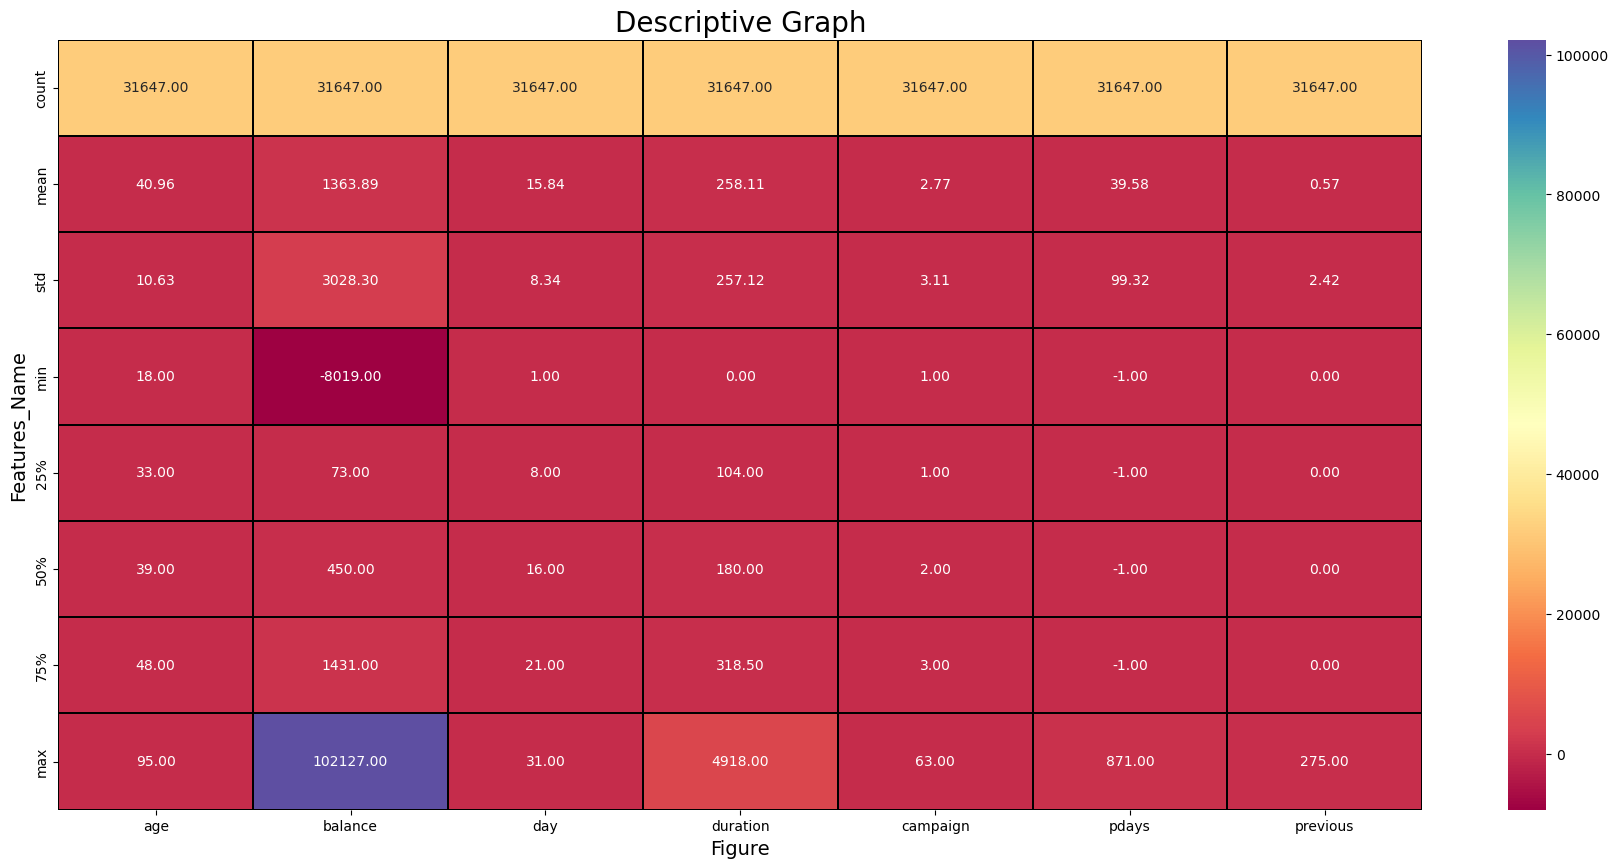

In [40]:
#Graphical view of statistical data description
plt.figure(figsize=(22,10))
sns.heatmap(train.describe(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('Figure',fontsize=14)
plt.ylabel('Features_Name',fontsize=14)
plt.title('Descriptive Graph',fontsize=20)
plt.show()

In [160]:
#from the statistical description above the count of all columns are similar therefore no missing data values
#mean value of age,balance,duration,campaign,pdays and previous is greater than the median(second percentile)therefore the data is skewed to the right
#in columns daythe mean is less than the median therefore the data is skewed to the left
#In all columns there are huge differences between the third percentile and max values which signify the existance of outliers in the data.

<bound method IndexOpsMixin.value_counts of 0         no
1         no
2         no
3        yes
4         no
        ... 
31642     no
31643    yes
31644     no
31645     no
31646    yes
Name: subscribed, Length: 31647, dtype: object>


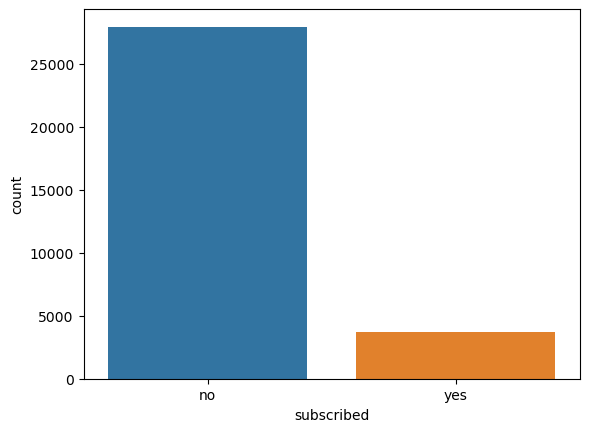

In [41]:
#Data visualization-Univariate analysis
#Visualize the number of subscribed customers
ax=sns.countplot(x='subscribed',data=train)
print(train['subscribed'].value_counts)#the bar graph above shows an imbalance in the class vaues of the data,this will be rectified by oversamoling

In [42]:
#Normalizing the frequency table of 'Subscribed' variable
train['subscribed'].value_counts(normalize=True)#only 12% subscribed

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64


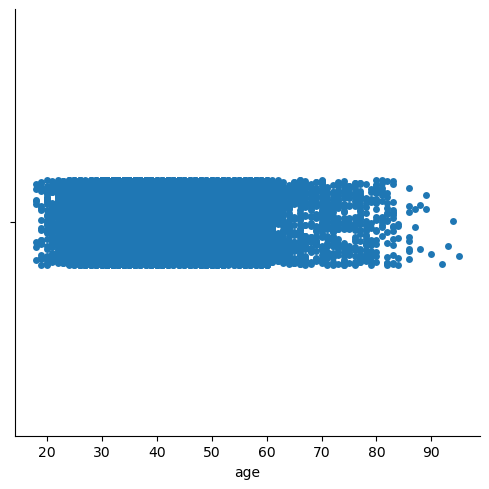

In [43]:
#Visualize the count of Age(most passengers were aged between 20 and 60)
print(train['age'].value_counts())
ax=sns.catplot(x='age',data=train)
plt.show()

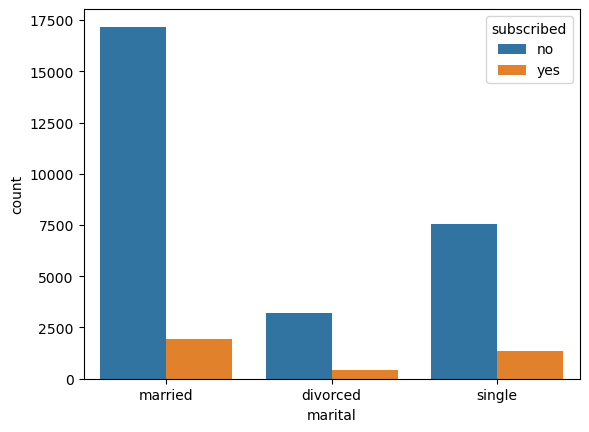

In [44]:
#majority of subsribers are married couples,followed by single and divorced respectively
sns.countplot(data=train, x='marital', hue='subscribed');

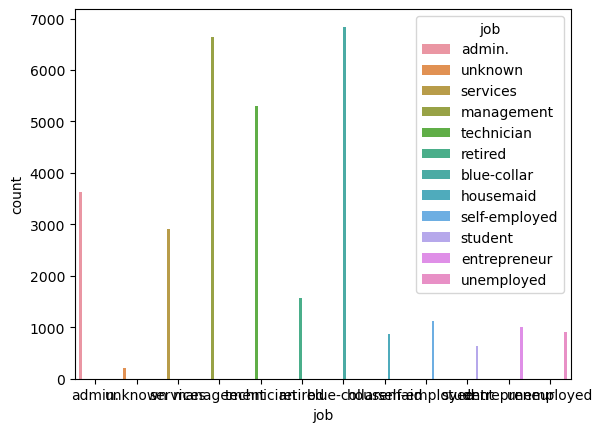

In [45]:
sns.countplot(data=train, x='job', hue='job');#majority of clients have blue collar jobs while students are the least because they generally don't have disposable income to save.

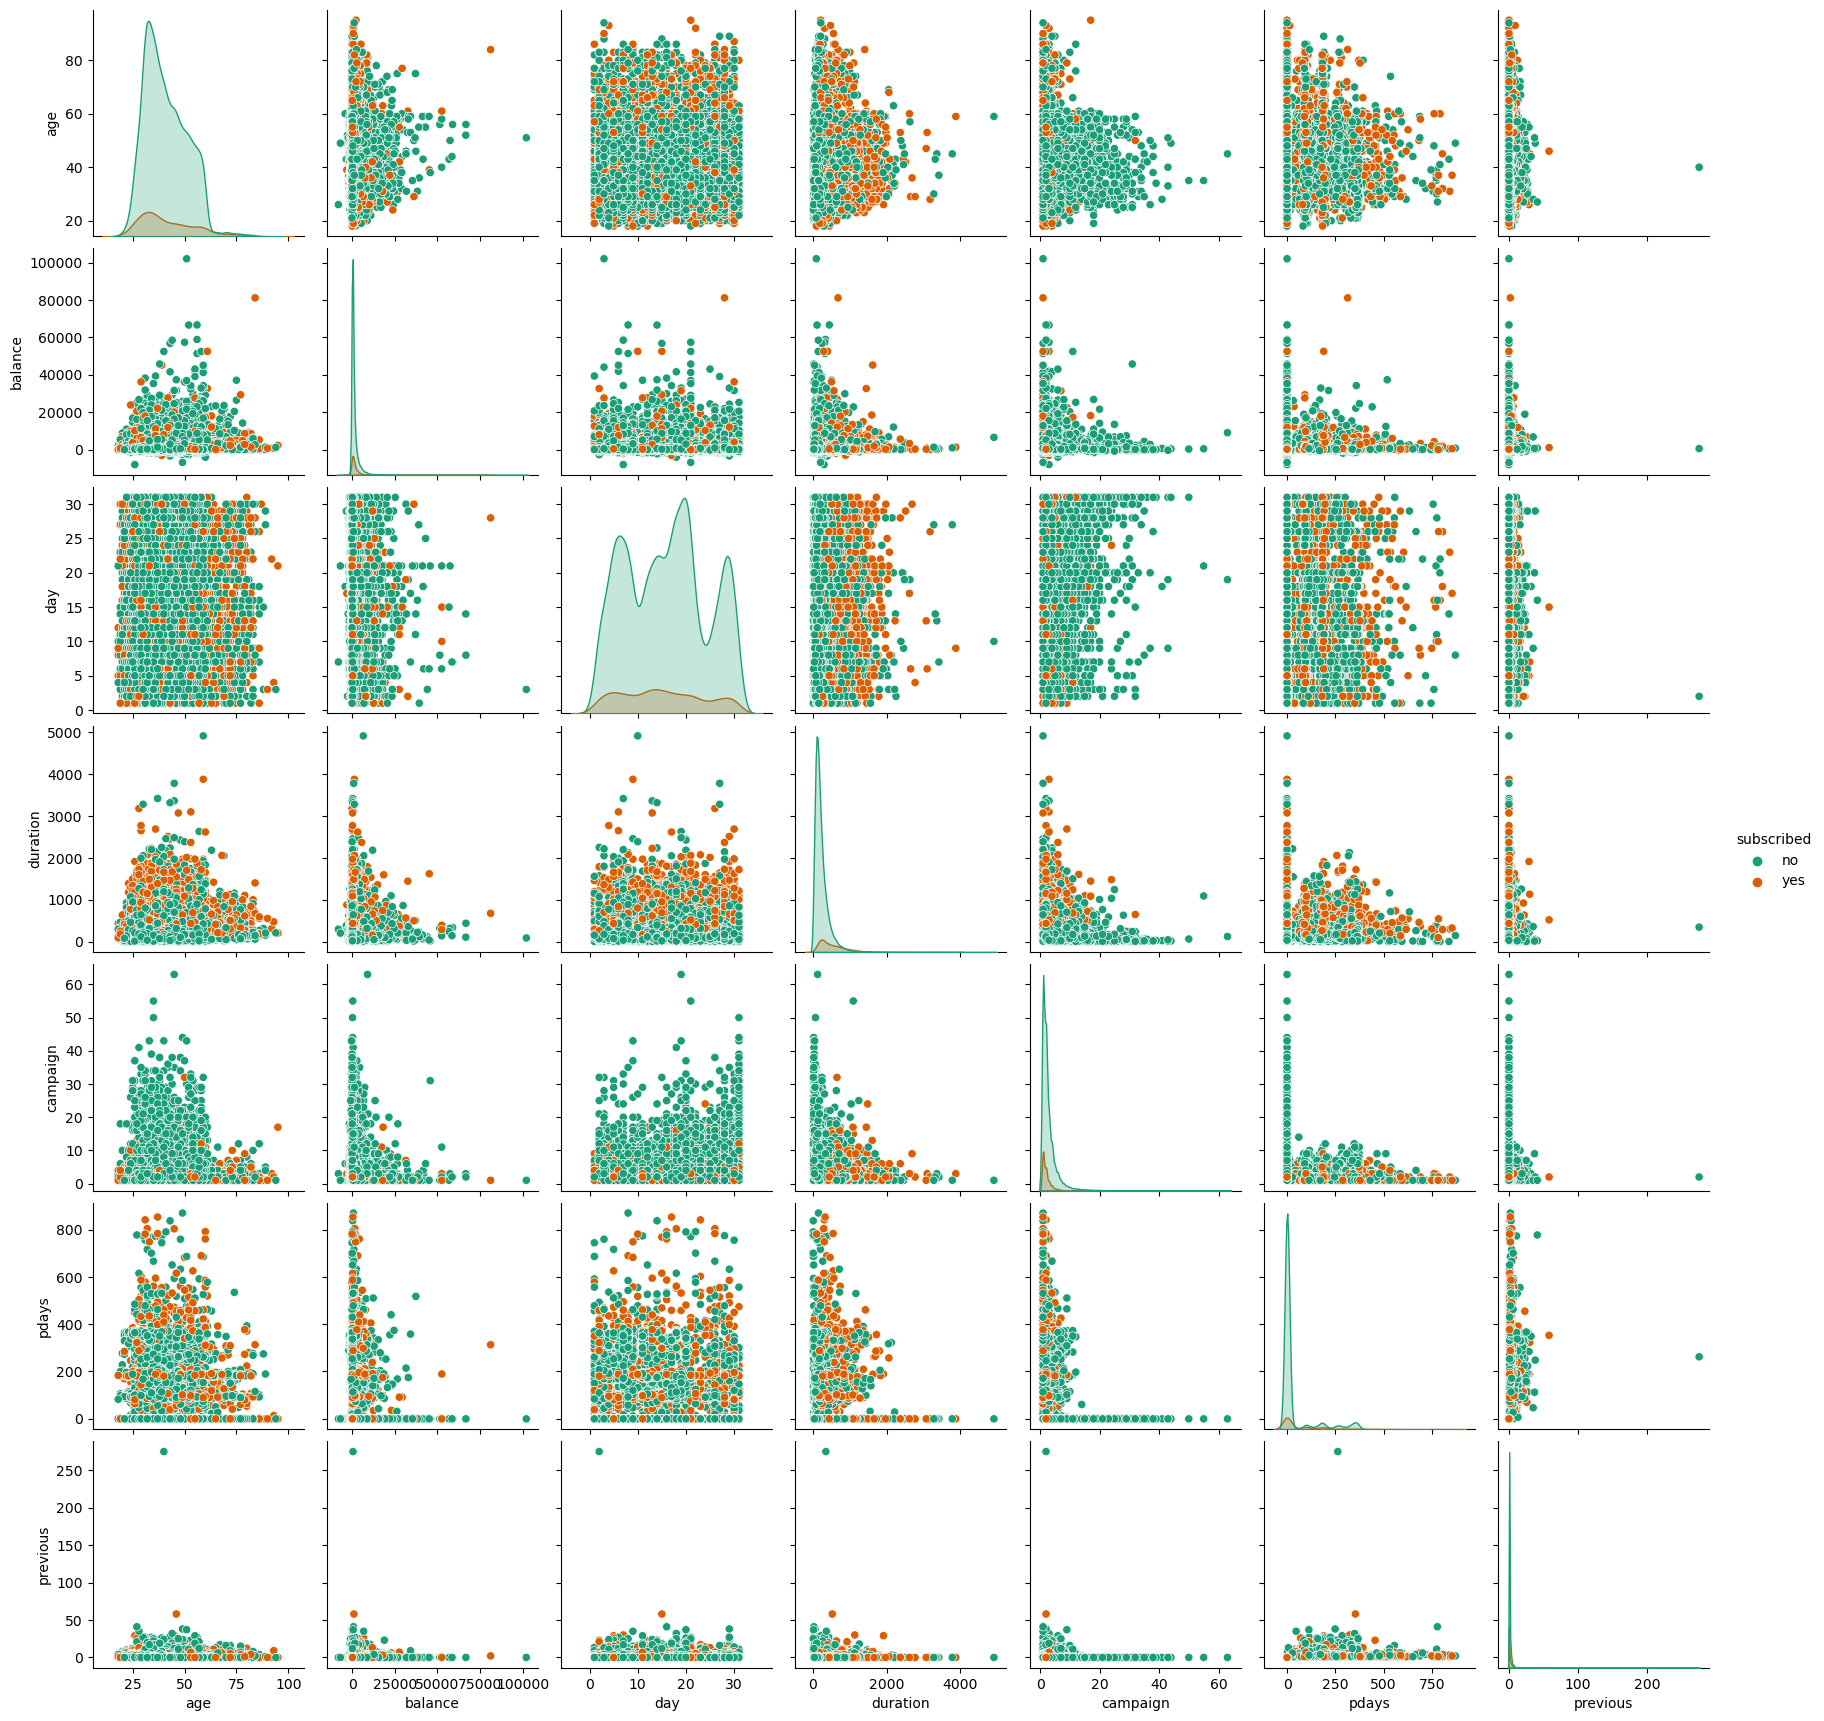

In [46]:
#Multivariate Analysis(the data shows some normal distribution when you check the diagonal plot)
sns.pairplot(train,hue="subscribed",palette="Dark2")
plt.show()

<Axes: >

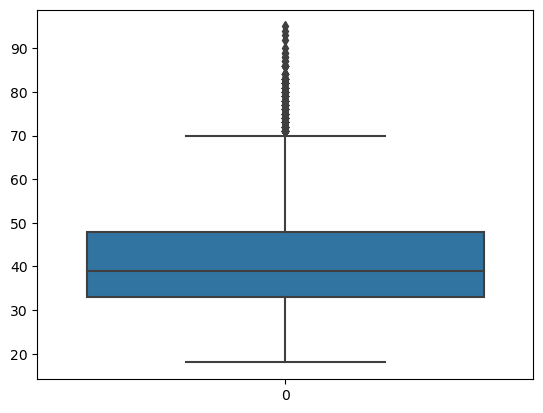

In [47]:
#checking outliers for every numerical columm
sns.boxplot(train.age)#all the boxplots confirm the presence of outliers as we can clearly see the difference between the minimum,maximum values and quantiles

<Axes: >

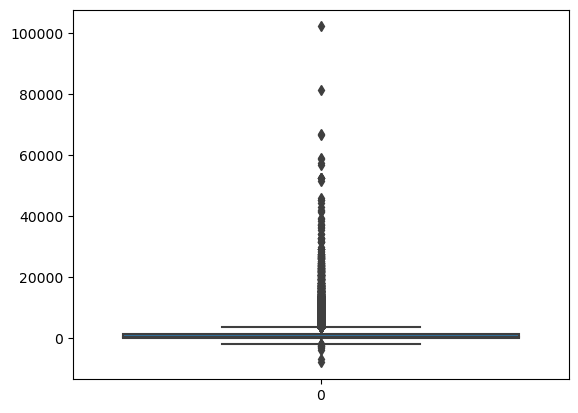

In [48]:
sns.boxplot(train.balance)

<Axes: >

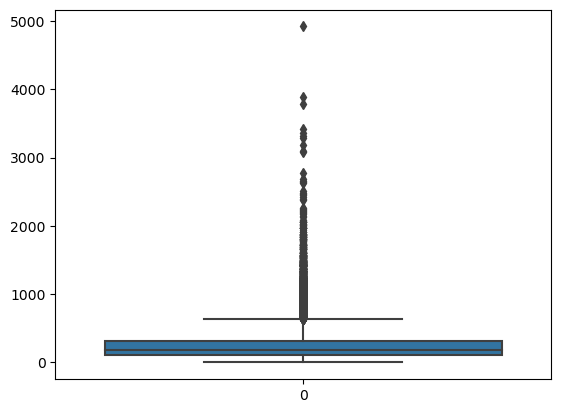

In [49]:
sns.boxplot(train.duration)

<Axes: >

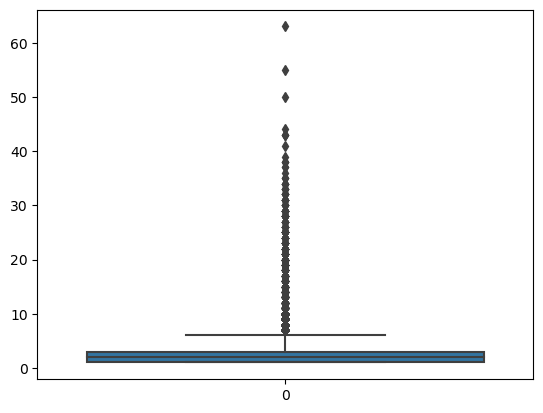

In [50]:
sns.boxplot(train.campaign)

<Axes: >

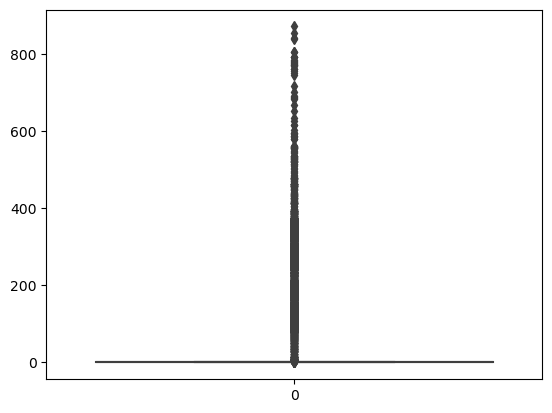

In [51]:
sns.boxplot(train.pdays)

<Axes: >

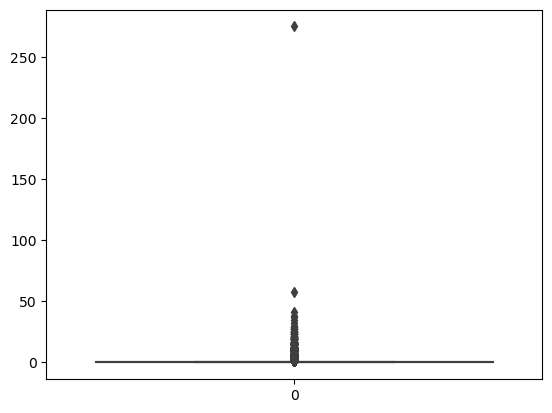

In [52]:
sns.boxplot(train.previous)

In [53]:
#Remove outliers using zscore method and Inter quartile range method then compare the two
from scipy.stats import zscore
out_features=train[['age','balance','day','duration','campaign','pdays','previous']]
z=np.abs(zscore(out_features))
z

age   balance       day  duration  campaign     pdays  previous
0      1.415793  0.187933  0.379579  0.832754  0.245906  0.408555  0.237059
1      0.937156  0.449397  0.499526  0.649957  0.245906  0.408555  0.237059
2      1.313627  0.156159  0.259631  0.070449  0.567059  0.408555  0.237059
3      1.509911  0.635055  0.739422  2.368149  0.567059  0.447299  1.001336
4      0.937156  0.411091  1.419637  0.474054  0.567059  0.408555  0.237059
...         ...       ...       ...       ...       ...       ...       ...
31642  1.125392  0.450388  0.460055  0.552724  0.245906  0.408555  0.237059
31643  1.133439  0.324903  1.299690  0.699635  0.245906  0.408555  0.237059
31644  0.843038  0.347358  1.059794  0.859979  0.075247  0.408555  0.237059
31645  1.509911  0.376088  0.100212  0.918319  1.359859  2.994723  4.716521
31646  1.321675  0.383022  0.580003  6.669728  0.245906  0.408555  0.237059

[31647 rows x 7 columns]

In [54]:
#threshold
np.where (z>3)

(array([   21,    26,    36, ..., 31622, 31645, 31646], dtype=int64),
 array([4, 1, 5, ..., 5, 6, 3], dtype=int64))

In [55]:
z.iloc[31622,5]

3.3974775370041375

In [56]:
#removing the data above zscore and creating new dataframe
train1=train[(z<3).all(axis=1)]
train1.shape

(28124, 17)

In [57]:
#shape of old and new dataframe
print("Old Data Frame-",train.shape[0])
print("New Data Frame-",train1.shape[0])

Old Data Frame- 31647
New Data Frame- 28124


In [58]:
print("Data Loss Percentage-",((train.shape[0]-train1.shape[0])/train.shape[0])*100)

Data Loss Percentage- 11.132176825607482


In [59]:
train1

age         job   marital  education default  balance housing loan  \
0       56      admin.   married    unknown      no     1933      no   no   
1       31     unknown   married  secondary      no        3      no   no   
2       27    services   married  secondary      no      891     yes   no   
3       57  management  divorced   tertiary      no     3287      no   no   
4       31  technician   married  secondary      no      119     yes   no   
...    ...         ...       ...        ...     ...      ...     ...  ...   
31640   43  management    single  secondary      no     2968      no   no   
31641   37  technician    single   tertiary      no     1309      no   no   
31642   29  management    single   tertiary      no        0     yes   no   
31643   53  management  divorced   tertiary      no      380      no  yes   
31644   32  management    single   tertiary      no      312      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
0      telephone   19   nov        44         2     -1         0  unknown   
1       cellular   20   jul        91         2     -1         0  unknown   
2       cellular   18   jul       240         1     -1         0  unknown   
3       cellular   22   jun       867         1     84         3  success   
4       cellular    4   feb       380         1     -1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
31640    unknown   20   jun        30         4     -1         0  unknown   
31641    unknown    6   jun       442         2     -1         0  unknown   
31642   cellular   12   may       116         2     -1         0  unknown   
31643   cellular    5   jun       438         2     -1         0  unknown   
31644   cellular    7   aug        37         3     -1         0  unknown   

      subscribed  
0             no  
1             no  
2             no  
3            yes  
4             no  
...          ...  
31640         no  
31641         no  
31642         no  
31643        yes  
31644         no  

[28124 rows x 17 columns]

In [60]:
train=train1

In [61]:
#Removing outliers using the interquartile range method
#1st quartile
Q1=out_features.quantile(0.25) 

#3rd quartile
Q3=out_features.quantile(0.75)

#IQR
IQR=Q3-Q1
train2=train[~((train<(Q1-1.5*IQR))|(train>(Q3+1.5*IQR))).any(axis=1)]
train2.shape

(19799, 17)

In [62]:
print("Data Loss Percentage-",((train.shape[0]-train2.shape[0])/train.shape[0])*100)

Data Loss Percentage- 29.60105248186602


In [ ]:
#I will not remove the outliers because I'll lose over 10% of data by either method.

In [63]:
train=train

In [64]:
#Checking for Skewness
train.skew()

age         0.438496
balance     2.437605
day         0.073752
duration    1.596552
campaign    2.059359
pdays       2.824483
previous    3.691573
dtype: float64

In [65]:
#Skeweness must be between -0.5 and 0.5,if not it must be removed
#Skeweness should not be removed from the target variable
#Remove skewness using cuberoot method
train['balance']=np.cbrt(train['balance'])

In [66]:
train.skew()

age         0.438496
balance    -0.435065
day         0.073752
duration    1.596552
campaign    2.059359
pdays       2.824483
previous    3.691573
dtype: float64

In [67]:
train['previous']=np.cbrt(train['previous'])

In [68]:
train.skew()

age         0.438496
balance    -0.435065
day         0.073752
duration    1.596552
campaign    2.059359
pdays       2.824483
previous    2.299676
dtype: float64

In [69]:
train['campaign']=np.cbrt(train['campaign'])

In [70]:
train.skew()

age         0.438496
balance    -0.435065
day         0.073752
duration    1.596552
campaign    0.997328
pdays       2.824483
previous    2.299676
dtype: float64

In [71]:
#removing skeweness by log transformation method
data = np.random.exponential(scale=10, size=1000)

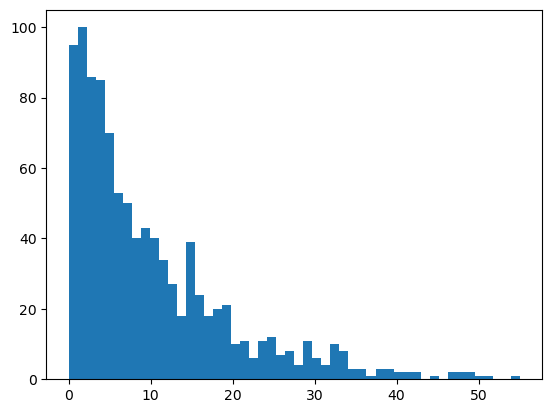

In [72]:
plt.hist(data, bins=50)

plt.show()

In [73]:
log_data = np.log(data)

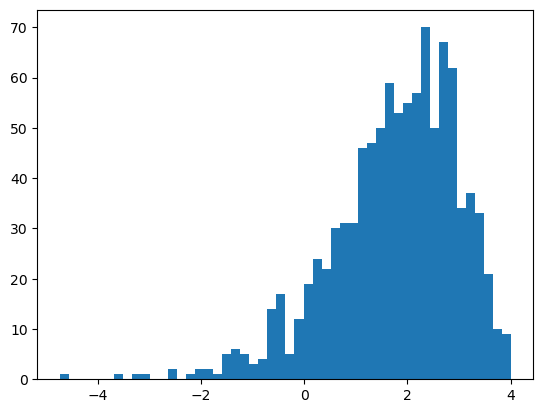

In [74]:
plt.hist(log_data, bins=50)

plt.show()

In [75]:
#checkfor skeweness after using two methods of removing skeweness
train.skew()

age         0.438496
balance    -0.435065
day         0.073752
duration    1.596552
campaign    0.997328
pdays       2.824483
previous    2.299676
dtype: float64

In [ ]:
#the skeweness wont entirely go away

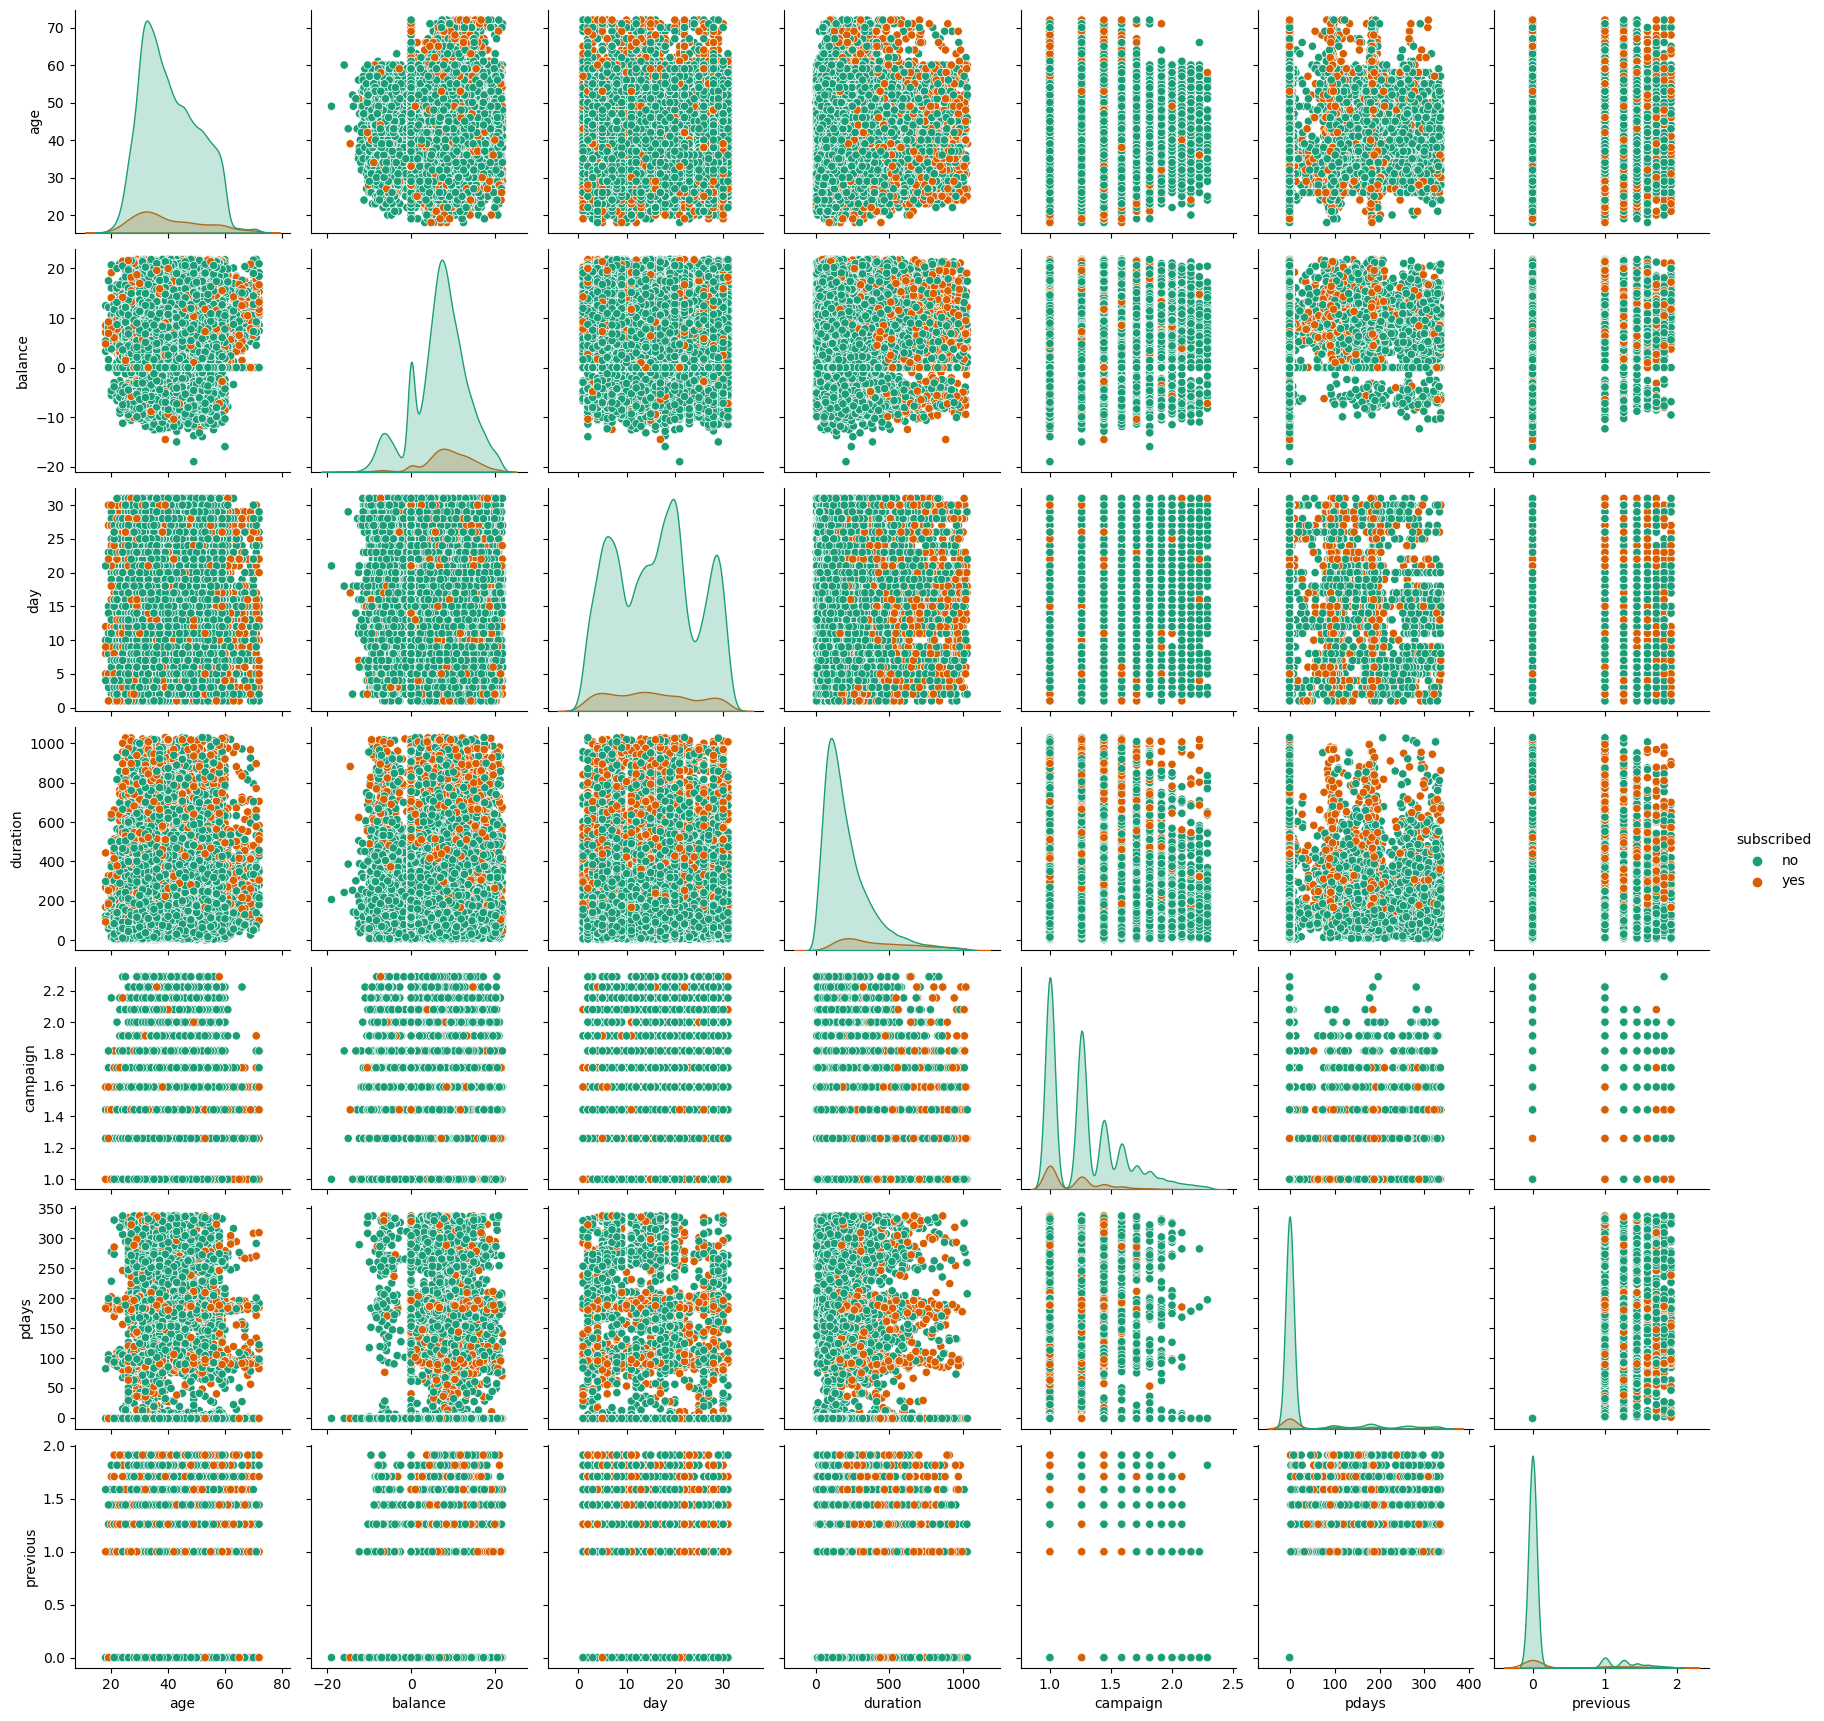

In [76]:
#Multivariate Analysis(the data shows some normal distribution when you check the diagonal plot)
sns.pairplot(train,hue="subscribed",palette="Dark2")
plt.show()

In [77]:
#Encoding categorical columns using Ordinal encorder
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in train.columns:
    if train[i].dtypes=='object':
        train[i]=OE.fit_transform(train[i].values.reshape(-1,1))
train

age   job  marital  education  default    balance  housing  loan  \
0       56   0.0      1.0        3.0      0.0  12.456918      0.0   0.0   
1       31  11.0      1.0        1.0      0.0   1.442250      0.0   0.0   
2       27   7.0      1.0        1.0      0.0   9.622603      1.0   0.0   
3       57   4.0      0.0        2.0      0.0  14.868480      0.0   0.0   
4       31   9.0      1.0        1.0      0.0   4.918685      1.0   0.0   
...    ...   ...      ...        ...      ...        ...      ...   ...   
31640   43   4.0      2.0        1.0      0.0  14.371032      0.0   0.0   
31641   37   9.0      2.0        2.0      0.0  10.939057      0.0   0.0   
31642   29   4.0      2.0        2.0      0.0   0.000000      1.0   0.0   
31643   53   4.0      0.0        2.0      0.0   7.243156      0.0   1.0   
31644   32   4.0      2.0        2.0      0.0   6.782423      0.0   0.0   

       contact  day  month  duration  campaign  pdays  previous  poutcome  \
0          1.0   19    9.0        44  1.259921     -1   0.00000       3.0   
1          0.0   20    5.0        91  1.259921     -1   0.00000       3.0   
2          0.0   18    5.0       240  1.000000     -1   0.00000       3.0   
3          0.0   22    6.0       867  1.000000     84   1.44225       2.0   
4          0.0    4    3.0       380  1.000000     -1   0.00000       3.0   
...        ...  ...    ...       ...       ...    ...       ...       ...   
31640      2.0   20    6.0        30  1.587401     -1   0.00000       3.0   
31641      2.0    6    6.0       442  1.259921     -1   0.00000       3.0   
31642      0.0   12    8.0       116  1.259921     -1   0.00000       3.0   
31643      0.0    5    6.0       438  1.259921     -1   0.00000       3.0   
31644      0.0    7    1.0        37  1.442250     -1   0.00000       3.0   

       subscribed  
0             0.0  
1             0.0  
2             0.0  
3             1.0  
4             0.0  
...           ...  
31640         0.0  
31641         0.0  
31642         0.0  
31643         1.0  
31644         0.0  

[28124 rows x 17 columns]

In [78]:
#check data after encoding 
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28124 entries, 0 to 31644
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         28124 non-null  int64  
 1   job         28124 non-null  float64
 2   marital     28124 non-null  float64
 3   education   28124 non-null  float64
 4   default     28124 non-null  float64
 5   balance     28124 non-null  float64
 6   housing     28124 non-null  float64
 7   loan        28124 non-null  float64
 8   contact     28124 non-null  float64
 9   day         28124 non-null  int64  
 10  month       28124 non-null  float64
 11  duration    28124 non-null  int64  
 12  campaign    28124 non-null  float64
 13  pdays       28124 non-null  int64  
 14  previous    28124 non-null  float64
 15  poutcome    28124 non-null  float64
 16  subscribed  28124 non-null  float64
dtypes: float64(13), int64(4)
memory usage: 3.9 MB


In [79]:
#checking the correlation between features and target
cor=train.corr()
cor

age       job   marital  education   default   balance  \
age         1.000000 -0.030552 -0.411087  -0.100363 -0.009616  0.079543   
job        -0.030552  1.000000  0.067076   0.169526 -0.007400  0.026094   
marital    -0.411087  0.067076  1.000000   0.109940 -0.012221  0.034716   
education  -0.100363  0.169526  0.109940   1.000000 -0.007467  0.064140   
default    -0.009616 -0.007400 -0.012221  -0.007467  1.000000 -0.209161   
balance     0.079543  0.026094  0.034716   0.064140 -0.209161  1.000000   
housing    -0.155557 -0.122764 -0.026593  -0.096581 -0.014763 -0.070652   
loan        0.005488 -0.038629 -0.045159  -0.047982  0.081270 -0.140556   
contact     0.029036 -0.084375 -0.042070  -0.121975  0.014592 -0.055374   
day        -0.009937  0.020514 -0.008386   0.017677  0.007138 -0.013262   
month      -0.042070 -0.088359 -0.003321  -0.056416  0.007290 -0.004558   
duration   -0.026878 -0.003064  0.015626   0.002073  0.000920  0.027393   
campaign    0.040856  0.007853 -0.030809  -0.009684  0.012757 -0.023629   
pdays      -0.010143  0.001769  0.013587   0.026682 -0.033086  0.068415   
previous    0.001564  0.016147  0.023993   0.054828 -0.040773  0.094890   
poutcome    0.000751 -0.011441 -0.015021  -0.041203  0.035944 -0.082925   
subscribed -0.007172  0.036743  0.056387   0.075838 -0.014500  0.094746   

             housing      loan   contact       day     month  duration  \
age        -0.155557  0.005488  0.029036 -0.009937 -0.042070 -0.026878   
job        -0.122764 -0.038629 -0.084375  0.020514 -0.088359 -0.003064   
marital    -0.026593 -0.045159 -0.042070 -0.008386 -0.003321  0.015626   
education  -0.096581 -0.047982 -0.121975  0.017677 -0.056416  0.002073   
default    -0.014763  0.081270  0.014592  0.007138  0.007290  0.000920   
balance    -0.070652 -0.140556 -0.055374 -0.013262 -0.004558  0.027393   
housing     1.000000  0.031251  0.215776 -0.015138  0.274293  0.011627   
loan        0.031251  1.000000 -0.012620  0.011949  0.026898 -0.010563   
contact     0.215776 -0.012620  1.000000 -0.030543  0.392662 -0.024035   
day        -0.015138  0.011949 -0.030543  1.000000  0.017204 -0.027286   
month       0.274293  0.026898  0.392662  0.017204  1.000000  0.007730   
duration    0.011627 -0.010563 -0.024035 -0.027286  0.007730  1.000000   
campaign   -0.043774 -0.001319 -0.001789  0.132730 -0.132335 -0.063650   
pdays       0.072618 -0.007713 -0.239045 -0.056337 -0.055621  0.011667   
previous    0.011504 -0.018351 -0.257049 -0.050992 -0.016079  0.013848   
poutcome   -0.049579  0.001714  0.248117  0.045799  0.022734  0.004046   
subscribed -0.145640 -0.074803 -0.158031 -0.030122 -0.022564  0.355888   

            campaign     pdays  previous  poutcome  subscribed  
age         0.040856 -0.010143  0.001564  0.000751   -0.007172  
job         0.007853  0.001769  0.016147 -0.011441    0.036743  
marital    -0.030809  0.013587  0.023993 -0.015021    0.056387  
education  -0.009684  0.026682  0.054828 -0.041203    0.075838  
default     0.012757 -0.033086 -0.040773  0.035944   -0.014500  
balance    -0.023629  0.068415  0.094890 -0.082925    0.094746  
housing    -0.043774  0.072618  0.011504 -0.049579   -0.145640  
loan       -0.001319 -0.007713 -0.018351  0.001714   -0.074803  
contact    -0.001789 -0.239045 -0.257049  0.248117   -0.158031  
day         0.132730 -0.056337 -0.050992  0.045799   -0.030122  
month      -0.132335 -0.055621 -0.016079  0.022734   -0.022564  
duration   -0.063650  0.011667  0.013848  0.004046    0.355888  
campaign    1.000000 -0.090000 -0.098357  0.102371   -0.081699  
pdays      -0.090000  1.000000  0.868301 -0.881013    0.116641  
previous   -0.098357  0.868301  1.000000 -0.909880    0.189480  
poutcome    0.102371 -0.881013 -0.909880  1.000000   -0.091071  
subscribed -0.081699  0.116641  0.189480 -0.091071    1.000000

<Axes: >

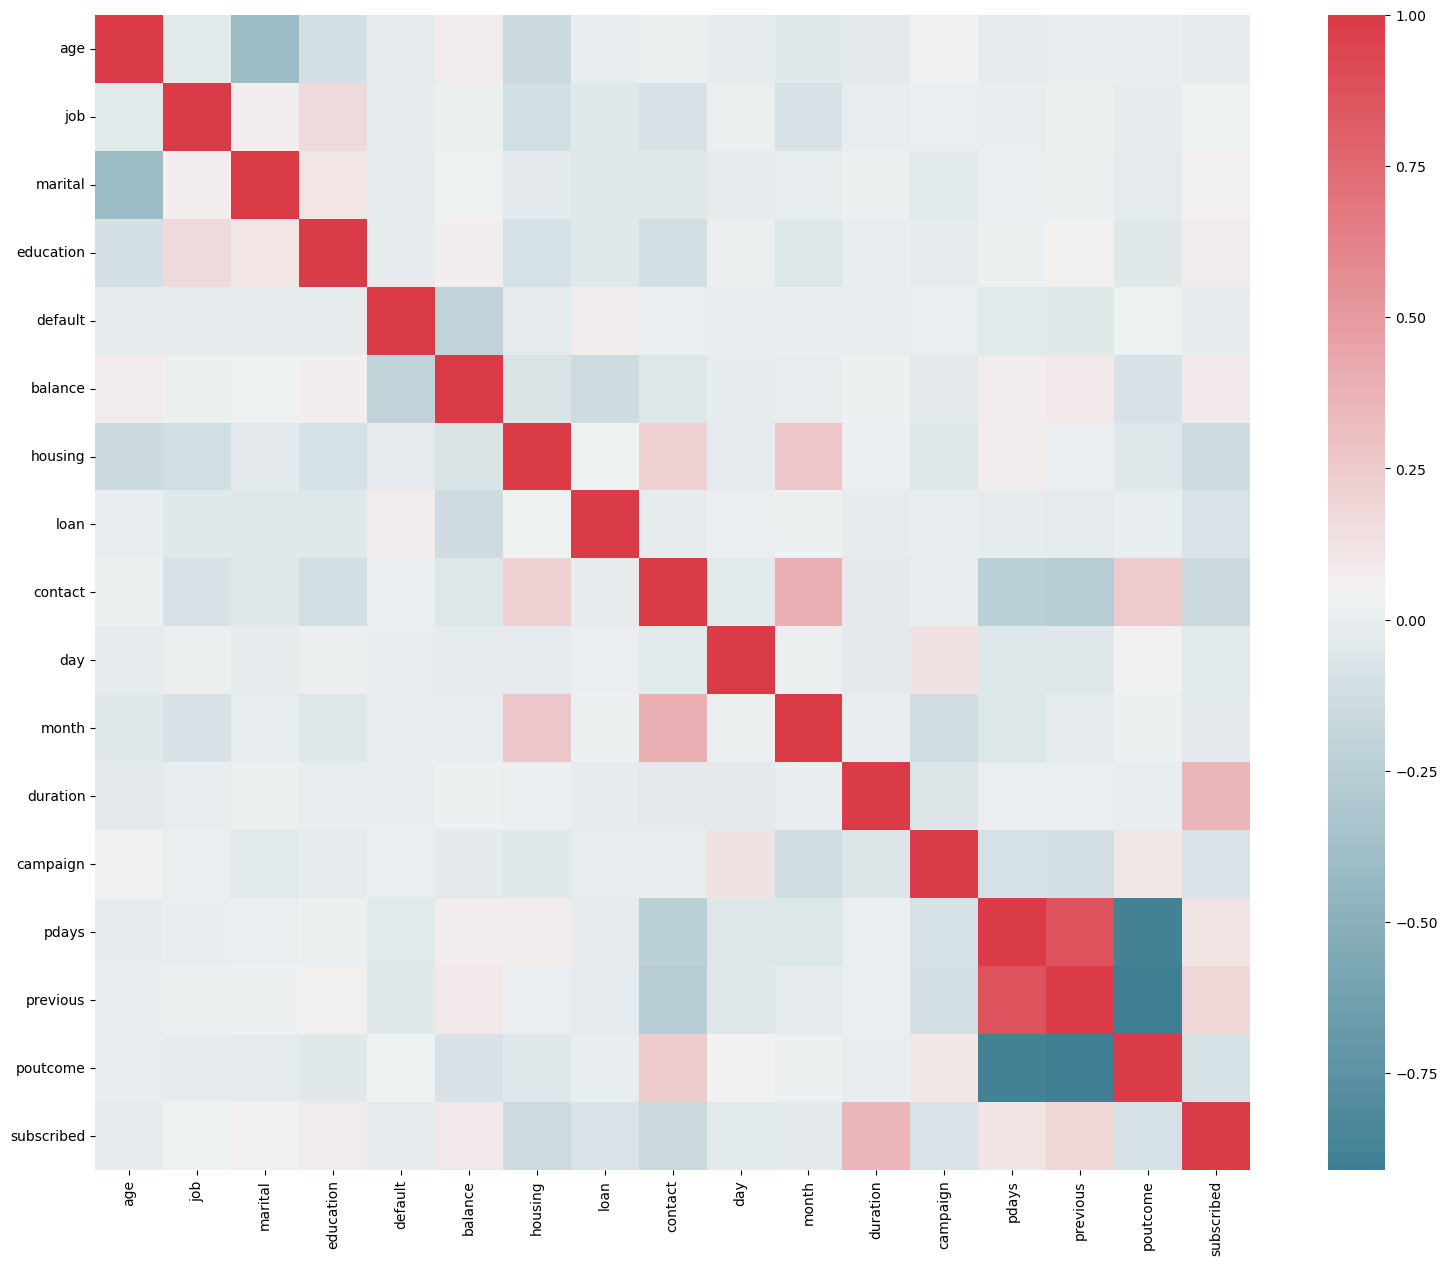

In [73]:
#Visualizing the correlation matrix byplotting heatmap.
f, ax = plt.subplots(figsize=(20, 15))
corr = train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [80]:
cor['subscribed'].sort_values(ascending=False)#there is little to no correlation between survival and other features.We dont have a multicollinearity issue

subscribed    1.000000
duration      0.355888
previous      0.189480
pdays         0.116641
balance       0.094746
education     0.075838
marital       0.056387
job           0.036743
age          -0.007172
default      -0.014500
month        -0.022564
day          -0.030122
loan         -0.074803
campaign     -0.081699
poutcome     -0.091071
housing      -0.145640
contact      -0.158031
Name: subscribed, dtype: float64

In [81]:
# dividing the dataset into dependent and independent variables

x=train.drop("subscribed",axis = 1)
y=train["subscribed"]
print("Feature Dimension=",x.shape)
print("Label Dimension=",y.shape)

Feature Dimension= (28124, 16)
Label Dimension= (28124,)


In [82]:
#Feature scaling and using standard scalarization to remove biasness
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

age       job   marital  education   default   balance   housing  \
0      1.522811 -1.321707 -0.276906   2.376931 -0.139916  0.857969 -1.106956   
1     -0.957368  2.023504 -0.276906  -0.301360 -0.139916 -0.920001 -1.106956   
2     -1.354197  0.807064 -0.276906  -0.301360 -0.139916  0.400458  0.903378   
3      1.622018 -0.105266 -1.927894   1.037785 -0.139916  1.247239 -1.106956   
4     -0.957368  1.415284 -0.276906  -0.301360 -0.139916 -0.358840  0.903378   
...         ...       ...       ...        ...       ...       ...       ...   
28119  0.233118 -0.105266  1.374081  -0.301360 -0.139916  1.166942 -1.106956   
28120 -0.362125  1.415284  1.374081   1.037785 -0.139916  0.612958 -1.106956   
28121 -1.155782 -0.105266  1.374081   1.037785 -0.139916 -1.152806  0.903378   
28122  1.225189 -0.105266 -1.927894   1.037785 -0.139916  0.016372 -1.106956   
28123 -0.858161 -0.105266  1.374081   1.037785 -0.139916 -0.057999 -1.106956   

           loan   contact       day     month  duration  campaign     pdays  \
0     -0.447423  0.359876  0.374734  1.175534 -1.008335 -0.066617 -0.361901   
1     -0.447423 -0.735486  0.493893 -0.164394 -0.761252 -0.066617 -0.361901   
2     -0.447423 -0.735486  0.255575 -0.164394  0.022055 -0.946471 -0.361901   
3     -0.447423 -0.735486  0.732212  0.170588  3.318250 -0.946471  0.846358   
4     -0.447423 -0.735486 -1.412653 -0.834358  0.758047 -0.946471 -0.361901   
...         ...       ...       ...       ...       ...       ...       ...   
28119 -0.447423  1.455237  0.493893  0.170588 -1.081934  1.041930 -0.361901   
28120 -0.447423  1.455237 -1.174334  0.170588  1.083987 -0.066617 -0.361901   
28121 -0.447423 -0.735486 -0.459380  0.840552 -0.629825 -0.066617 -0.361901   
28122  2.235019 -0.735486 -1.293493  0.170588  1.062959 -0.066617 -0.361901   
28123 -0.447423 -0.735486 -1.055175 -1.504322 -1.045135  0.550580 -0.361901   

       previous  poutcome  
0     -0.392832  0.377632  
1     -0.392832  0.377632  
2     -0.392832  0.377632  
3      2.737549 -0.766204  
4     -0.392832  0.377632  
...         ...       ...  
28119 -0.392832  0.377632  
28120 -0.392832  0.377632  
28121 -0.392832  0.377632  
28122 -0.392832  0.377632  
28123 -0.392832  0.377632  

[28124 rows x 16 columns]

In [83]:
#Modelling

#Finding the best random state

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS = 0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu,"at random_state",maxRS)

Best accuracy is  0.9242666666666667 at random_state 72


In [84]:
#creating train test split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=maxRS)

In [85]:
#Import classification algorithms

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [87]:
#checking accuracy for Random Forest Classifier

RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.9217777777777778
[[5002   96]
 [ 344  183]]
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      5098
         1.0       0.66      0.35      0.45       527

    accuracy                           0.92      5625
   macro avg       0.80      0.66      0.71      5625
weighted avg       0.91      0.92      0.91      5625



In [88]:
# checking testing accuracy:
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
predKNN=KNN.predict(x_test)
print(accuracy_score(y_test,predKNN))
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN))

0.9136
[[4987  111]
 [ 375  152]]
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      5098
         1.0       0.58      0.29      0.38       527

    accuracy                           0.91      5625
   macro avg       0.75      0.63      0.67      5625
weighted avg       0.90      0.91      0.90      5625



In [89]:
#checking accuracy of Logistic Regression

LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.9159111111111111
[[4997  101]
 [ 372  155]]
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      5098
         1.0       0.61      0.29      0.40       527

    accuracy                           0.92      5625
   macro avg       0.77      0.64      0.68      5625
weighted avg       0.90      0.92      0.90      5625



In [90]:
#checking accuracy for Support Vector Machine Classifier
SVC=SVC()
SVC.fit(x_train,y_train)
predSVC=SVC.predict(x_test)
print(accuracy_score(y_test,predSVC))
print(confusion_matrix(y_test,predSVC))
print(classification_report(y_test,predSVC))

0.9207111111111111
[[5055   43]
 [ 403  124]]
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      5098
         1.0       0.74      0.24      0.36       527

    accuracy                           0.92      5625
   macro avg       0.83      0.61      0.66      5625
weighted avg       0.91      0.92      0.90      5625



In [91]:
#checking accuracy for Gradient Boosting Classifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.9208888888888889
[[5020   78]
 [ 367  160]]
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96      5098
         1.0       0.67      0.30      0.42       527

    accuracy                           0.92      5625
   macro avg       0.80      0.64      0.69      5625
weighted avg       0.91      0.92      0.91      5625



In [92]:
#checking accuracy for AdaBoost Classifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.9137777777777778
[[4982  116]
 [ 369  158]]
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      5098
         1.0       0.58      0.30      0.39       527

    accuracy                           0.91      5625
   macro avg       0.75      0.64      0.67      5625
weighted avg       0.90      0.91      0.90      5625



In [93]:
#checking accuracy for Bagging Classifier
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.9152
[[4975  123]
 [ 354  173]]
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      5098
         1.0       0.58      0.33      0.42       527

    accuracy                           0.92      5625
   macro avg       0.76      0.65      0.69      5625
weighted avg       0.90      0.92      0.90      5625



In [94]:
#checking accuracy for ExtraTreesClassifier
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.9182222222222223
[[5012   86]
 [ 374  153]]
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96      5098
         1.0       0.64      0.29      0.40       527

    accuracy                           0.92      5625
   macro avg       0.79      0.64      0.68      5625
weighted avg       0.90      0.92      0.90      5625



In [95]:
#Cross validation Score
from sklearn.model_selection import cross_val_score

In [96]:
#Checking CV score for Random Forest Classifier
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predRFC)-score.mean())

[0.91555556 0.91466667 0.91182222 0.91377778 0.91322902]
0.9138102481428797
Difference between Accuracy score and cross validation score is - 0.007967529634898107


In [97]:
#Checking CV score for KNN neighbours Classifier
score=cross_val_score(KNN,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predKNN)-score.mean())

[0.904      0.9072     0.90346667 0.9024     0.9052276 ]
0.9044588525367473
Difference between Accuracy score and cross validation score is - 0.009141147463252675


In [98]:
#Checking CV score for Logistic Regression
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predLR)-score.mean())

[0.9072     0.90755556 0.90613333 0.90524444 0.91002845]
0.9072323565670934
Difference between Accuracy score and cross validation score is - 0.008678754544017675


In [99]:
#Checking CV score for Support Vector Machine Classifier
score=cross_val_score(SVC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predSVC)-score.mean())

[0.90968889 0.90951111 0.90915556 0.90986667 0.91073969]
0.9097923818555398
Difference between Accuracy score and cross validation score is - 0.010918729255571358


In [100]:
#Checking CV score for Gradient Boosting Classifier
score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predGB)-score.mean())

[0.912      0.91146667 0.91164444 0.91271111 0.91002845]
0.9115701343448712
Difference between Accuracy score and cross validation score is - 0.009318754544017649


In [101]:
#Checking CV score for AdaBoost Classifier
score=cross_val_score(ABC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predABC)-score.mean())

[0.90648889 0.90826667 0.9056     0.90968889 0.90860597]
0.9077300837679786
Difference between Accuracy score and cross validation score is - 0.006047694009799209


In [102]:
#Checking CV score for Bagging Classifier
score=cross_val_score(BC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predBC)-score.mean())

[0.90755556 0.90791111 0.91111111 0.90862222 0.90309388]
0.9076587766714083
Difference between Accuracy score and cross validation score is - 0.007541223328591751


In [103]:
#Checking CV score for ExtraTreesClassifier
score=cross_val_score(ET,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predET)-score.mean())

[0.91111111 0.91235556 0.90986667 0.91111111 0.91198435]
0.9112857594436541
Difference between Accuracy score and cross validation score is - 0.0069364627785681865


In [ ]:
#Model Selection
#AdaBoost Classifier is the best model with the least difference between accuracy and cross validation score

In [104]:
#Hyper parameter tuning

from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[1,2],'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1.0],'algorithm':['SAMME.R'],'random_state':[10,50,100]}

GVC=GridSearchCV(AdaBoostClassifier(),parameters,cv=5)
GVC.fit(x_train,y_train)

GVC.best_params_
{'n_estimators':1,'learning_rate':1.0,'algorithm':'SAMME.R','random_state':1000}

Final_model=AdaBoostClassifier(n_estimators=1,learning_rate=1.0,algorithm='SAMME.R',random_state=1000)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

90.63111111111111
